In [52]:
# 1. Data Loading and Initial Inspection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [53]:
# Load dataset
df = pd.read_csv("weather dataset.csv")
df


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [55]:
print(df.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [56]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [57]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [58]:
df.nunique()

,0
date,1461
precipitation,111
temp_max,67
temp_min,55
wind,79
weather,5


In [59]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Check for missing values
print(df.isnull().sum())

# Encode 'weather' column
le = LabelEncoder()
df['weather_encoded'] = le.fit_transform(df['weather'])

# Drop original 'weather' and 'date' columns
X = df.drop(['weather', 'weather_encoded', 'date'], axis=1)
y = df['weather_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


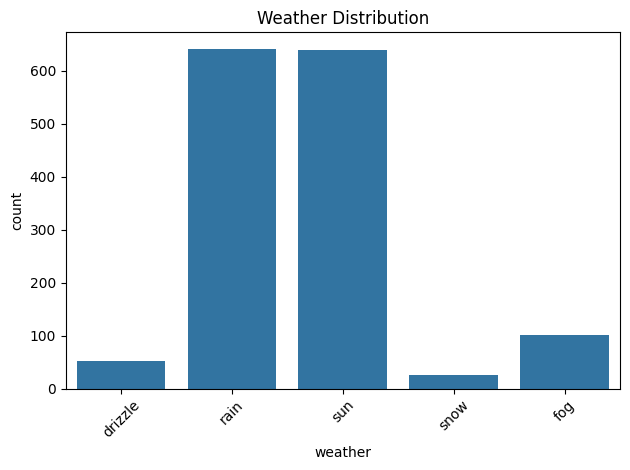

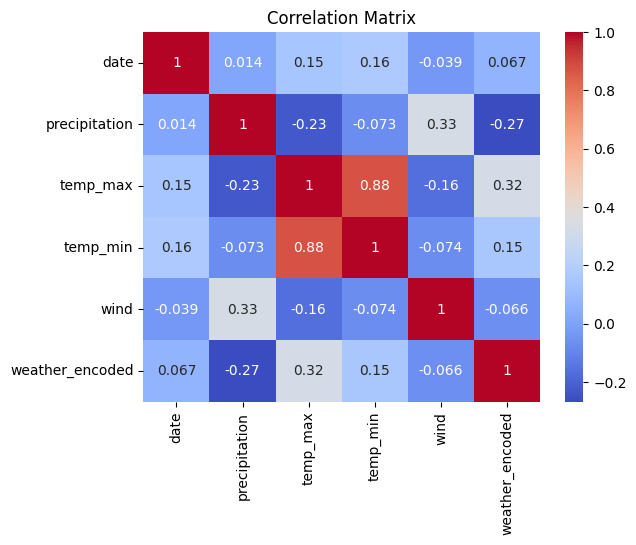

In [60]:
# 3. Exploratory Data Analysis (EDA)
sns.countplot(x='weather', data=df)
plt.title("Weather Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Drop the original 'weather' column from df before calculating correlation
df_numeric = df.drop('weather', axis=1)

# Calculate and plot the correlation matrix using the DataFrame without the string column
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [61]:
# 4. Splitting Data and Applying Machine Learning Models
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracies[name] = accuracy
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=le.classes_))



Model: Logistic Regression
Accuracy: 77.82%
[[  0   0   1   0   8]
 [  0   0   2   0  23]
 [  0   0 102   0  18]
 [  0   0   6   1   1]
 [  0   0   6   0 125]]
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.87      0.85      0.86       120
        snow       1.00      0.12      0.22         8
         sun       0.71      0.95      0.82       131

    accuracy                           0.78       293
   macro avg       0.52      0.39      0.38       293
weighted avg       0.70      0.78      0.72       293


Model: Decision Tree
Accuracy: 72.70%
[[  0   1   0   0   8]
 [  1   6   3   0  15]
 [  1   0 105   7   7]
 [  0   0   5   3   0]
 [  9  16   7   0  99]]
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.26      0.24      0.25        25
        rain       0.88      0.8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Random Forest
Accuracy: 81.23%
[[  1   0   0   0   8]
 [  1   2   1   0  21]
 [  0   0 109   3   8]
 [  0   0   6   2   0]
 [  2   4   1   0 124]]
              precision    recall  f1-score   support

     drizzle       0.25      0.11      0.15         9
         fog       0.33      0.08      0.13        25
        rain       0.93      0.91      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.77      0.95      0.85       131

    accuracy                           0.81       293
   macro avg       0.54      0.46      0.47       293
weighted avg       0.77      0.81      0.78       293



In [64]:
# 5. Predict for Unseen Data (User Inputs)
try:
    # Collect input from user
    precipitation = float(input("Enter precipitation (e.g., 5.0): "))
    temp_max = float(input("Enter max temperature (e.g., 15.0): "))
    temp_min = float(input("Enter min temperature (e.g., 7.0): "))
    wind = float(input("Enter wind speed (e.g., 3.5): "))

    # Create and scale the sample
    unseen_sample = np.array([[precipitation, temp_max, temp_min, wind]])
    unseen_scaled = scaler.transform(unseen_sample)

    # Predict using the best model (you can change the model here)
    predicted_class = models['Random Forest'].predict(unseen_scaled)
    print("\nPrediction for unseen data:", le.inverse_transform(predicted_class)[0])

except ValueError:
    print("Invalid input. Please enter numeric values.")


Enter precipitation (e.g., 5.0): 0.0
Enter max temperature (e.g., 15.0): 7.2
Enter min temperature (e.g., 7.0): 0.6
Enter wind speed (e.g., 3.5): 2.6

Prediction for unseen data: fog


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
